In [69]:
import matplotlib.pyplot as plt
import networkx as nx
import geopandas as gpd
import libpysal
import numpy as np
import pysal
import pandas as pd
#from libpysal.weights.contiguity import Queen
from libpysal.weights import Queen, Rook, KNN, Kernel
from splot.libpysal import plot_spatial_weights

import pickle

In [70]:
path = 'maps/Wojewodztwa/Województwa.shp'
# https://github.com/Toblerity/Fiona/issues/548
gdf = gpd.read_file(path) 
for i in range(len(gdf.JPT_NAZWA_)):
    gdf.JPT_NAZWA_[i] = gdf.JPT_NAZWA_[i].encode("latin1","strict").decode('utf-8')
#print(gdf.head())

/home/marek/.local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [71]:
gdf.head()

,JPT_SJR_KO,JPT_KOD_JE,JPT_NAZWA_,JPT_ORGAN_,JPT_JOR_ID,WERSJA_OD,WERSJA_DO,WAZNY_OD,WAZNY_DO,JPT_KOD__1,...,JPT_KJ_I_1,JPT_KJ_I_2,JPT_OPIS,JPT_SPS_KO,ID_BUFOR_1,JPT_ID,JPT_KJ_I_3,Shape_Leng,Shape_Area,geometry
0,WOJ,24,śląskie,None,0,2017-10-10,None,2012-09-26,None,None,...,24,None,None,UZG,0,1331323,None,12.136952,1.557335,"MULTIPOLYGON (((18.91685 51.09608, 18.91677 51..."
1,WOJ,16,opolskie,None,0,2017-10-10,None,2012-09-26,None,None,...,16,None,None,UZG,0,1331326,None,9.005207,1.196205,"POLYGON ((17.81203 51.18669, 17.81209 51.18670..."
2,WOJ,30,wielkopolskie,None,0,2016-05-05,None,2012-09-26,None,None,...,30,None,None,UZG,0,1311516,None,18.408173,3.932196,"POLYGON ((16.71447 53.29913, 16.71447 53.29920..."
3,WOJ,32,zachodniopomorskie,None,0,2019-01-17,None,2012-09-26,None,None,...,32,None,None,UZG,0,1351683,None,12.146499,3.106476,"POLYGON ((14.22608 53.92774, 14.22633 53.92864..."
4,WOJ,26,świętokrzyskie,None,0,2012-09-26,None,2012-09-26,None,None,...,26,None,None,UZG,0,829374,None,9.264959,1.491827,"POLYGON ((19.70430 50.75239, 19.70443 50.75248..."


In [72]:
#weights = Queen.from_dataframe(gdf)
wq = Queen.from_dataframe(gdf)

(13.621739949250054, 24.646927985750054, 48.71032801055003, 55.12813517445003)

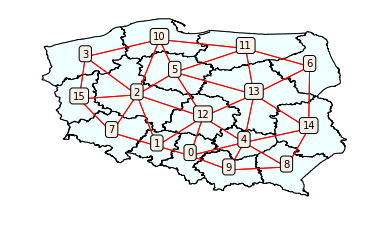

In [77]:
pos_w = {}

woj = gdf
woj['centroid'] = woj['geometry'].centroid

ax = gdf.plot(edgecolor='grey', facecolor='w')
fig, ax = wq.plot(gdf, ax=ax, 
        edge_kws=dict(color='r', linestyle='-', linewidth=1),
        node_kws=dict(marker=''))
#plt.subplots(1, figsize=(50,50))
gdf.plot(color='azure', edgecolor='black', ax=ax)
props = dict(boxstyle='round', facecolor='linen', alpha=1)
for point in woj.iterrows():
    ax.text(point[1]['centroid'].x,
            point[1]['centroid'].y,
            point[0],
            horizontalalignment='center',
            fontsize=10,
            bbox=props)
    pos_w[point[0]] = [point[1]['centroid'].x, point[1]['centroid'].y]

ax.axis('off')

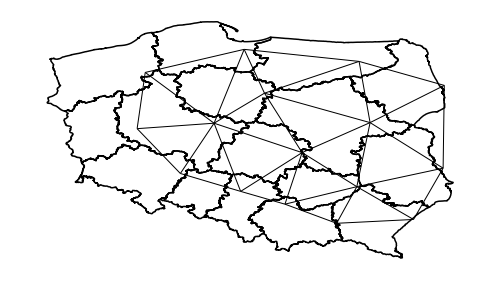

In [78]:
#plot_spatial_weights(weights, gdf, figsize=(8,8))
#ax = gdf.plot(edgecolor='grey', facecolor='w', figsize=(8,8))
#nx.draw(my_graph, pos_w)  
fig, ax = plt.subplots(figsize=(8, 8))

#gdf.plot(edgecolor='grey', facecolor='w', ax=ax)
gdf.boundary.plot(ax=ax, color="k")
nx.draw_networkx_edges(my_graph, pos_w)
#nx.draw(my_graph, pos_w)  
ax.axis('off')
plt.show()
#plt.savefig('poland_wojew_neigh.pdf', bbox_inches='tight')

In [47]:
contig_matrix = libpysal.weights.Rook.from_shapefile(path)

# build list of edges - this will create edges going both ways from connected nodes, so you might need to remove duplicates
nodes = contig_matrix.weights.keys()  # to get dict of keys, alternatively use contig_matrix.id2i.keys()
edges = [(node, neighbour) for node in nodes for neighbour in contig_matrix[node]]
my_graph = nx.Graph(edges)

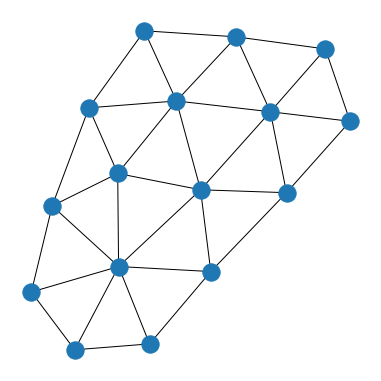

In [48]:
plt.figure(figsize=(5,5))
nx.draw(my_graph)  # networkx draw()
plt.draw()  # pyplot draw()
plt.show()

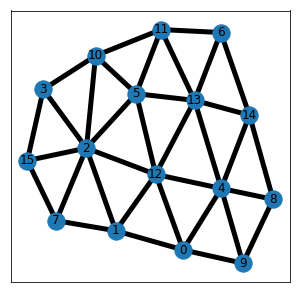

In [69]:
plt.figure(figsize=(5,5))
nx.draw_networkx(my_graph, width=5)
#plt.figure(figsize=(100,100))
plt.draw()  # pyplot draw()
plt.show()

In [72]:
contig_matrix.neighbors

{0: [1, 4, 12, 9],
 1: [0, 2, 12, 7],
 2: [1, 3, 5, 7, 10, 12, 15],
 3: [2, 10, 15],
 4: [0, 8, 9, 12, 13, 14],
 5: [2, 10, 11, 12, 13],
 6: [11, 13, 14],
 7: [1, 2, 15],
 8: [9, 4, 14],
 9: [0, 8, 4],
 10: [11, 2, 3, 5],
 11: [10, 13, 5, 6],
 12: [0, 1, 2, 4, 5, 13],
 13: [4, 5, 6, 11, 12, 14],
 14: [8, 4, 13, 6],
 15: [2, 3, 7]}

In [74]:
wojew = {}
for node in contig_matrix.neighbors:
    tmp_list = []
    for neigh in contig_matrix.neighbors[node]:
        tmp_list.append( gdf.loc[neigh,'JPT_NAZWA_'] )
    wojew[gdf.loc[node,'JPT_NAZWA_']] = tmp_list
wojew

{'śląskie': ['opolskie', 'świętokrzyskie', 'łódzkie', 'małopolskie'],
 'opolskie': ['śląskie', 'wielkopolskie', 'łódzkie', 'dolnośląskie'],
 'wielkopolskie': ['opolskie',
  'zachodniopomorskie',
  'kujawsko-pomorskie',
  'dolnośląskie',
  'pomorskie',
  'łódzkie',
  'lubuskie'],
 'zachodniopomorskie': ['wielkopolskie', 'pomorskie', 'lubuskie'],
 'świętokrzyskie': ['śląskie',
  'podkarpackie',
  'małopolskie',
  'łódzkie',
  'mazowieckie',
  'lubelskie'],
 'kujawsko-pomorskie': ['wielkopolskie',
  'pomorskie',
  'warmińsko-mazurskie',
  'łódzkie',
  'mazowieckie'],
 'podlaskie': ['warmińsko-mazurskie', 'mazowieckie', 'lubelskie'],
 'dolnośląskie': ['opolskie', 'wielkopolskie', 'lubuskie'],
 'podkarpackie': ['małopolskie', 'świętokrzyskie', 'lubelskie'],
 'małopolskie': ['śląskie', 'podkarpackie', 'świętokrzyskie'],
 'pomorskie': ['warmińsko-mazurskie',
  'wielkopolskie',
  'zachodniopomorskie',
  'kujawsko-pomorskie'],
 'warmińsko-mazurskie': ['pomorskie',
  'mazowieckie',
  'kujawsko-p

In [77]:
a_file = open("wojew_neighbours.pkl", "wb")

pickle.dump(wojew, a_file)

a_file.close()

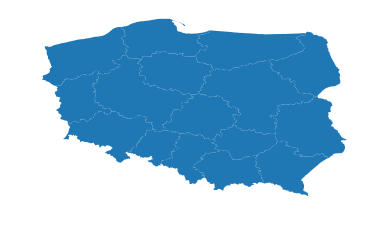

In [19]:
gdf = gpd.read_file(path)
ax = gdf.plot()
ax.set_axis_off()

In [26]:
my_graph

In [19]:
w_rook = Rook.from_dataframe(gdf)
w_queen = Queen.from_dataframe(gdf)
#https://github.com/pysal/libpysal/blob/master/notebooks/weights.ipynb

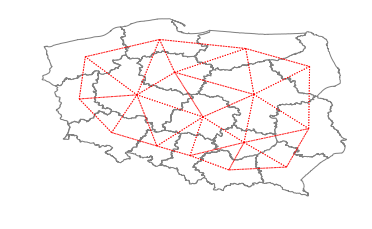

In [20]:
ax = gdf.plot(edgecolor='grey', facecolor='w')
f,ax = w_rook.plot(gdf, ax=ax, 
        edge_kws=dict(color='r', linestyle=':', linewidth=1),
        node_kws=dict(marker=''))
ax.set_axis_off()

In [21]:
w_queen.islands

[]

In [22]:
w_rook.islands
#https://libpysal.readthedocs.io/en/latest/generated/libpysal.weights.Rook.html

[]

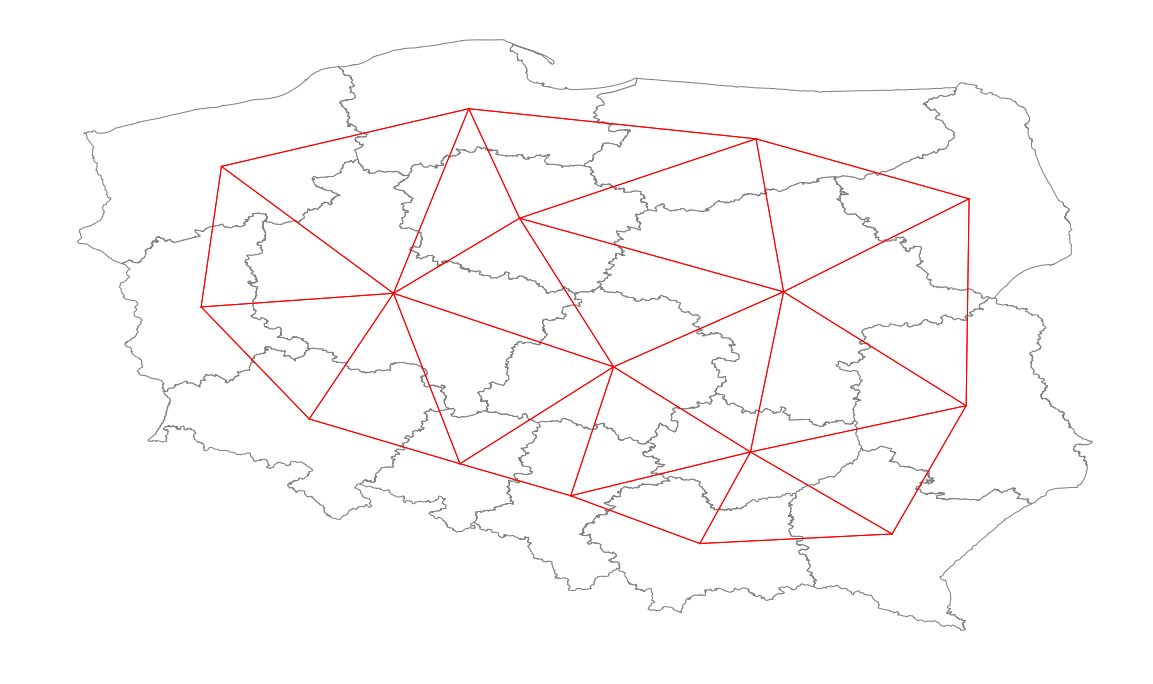

In [23]:
rs_df = gpd.read_file(path)

plt.rcParams["figure.figsize"] = (20,15)

ax = rs_df.plot(edgecolor='grey', facecolor='w')
f,ax = w_queen.plot(rs_df, ax=ax, 
        edge_kws=dict(color='r', linestyle='-', linewidth=1),
        node_kws=dict(marker=''))
#ax.set_title('Rio Grande do Sul: Nonplanar Weights')
ax.set_axis_off()